In [0]:
from pylab import *
from scipy import fft
import matplotlib.pyplot as plt
from scipy.signal import periodogram as psd
import numpy as np
from scipy.signal import find_peaks
from math import sqrt, sin
from cmath import pi
import scipy as sp
from scipy import integrate 
import pandas as pd

%matplotlib inline

The purpose of this file is to run a model/simulation of the FTS and the necessary fourier transform methods that will be necessary to extract information from our experimental data

# Part 1: Fourier Transform exmaples to see how different parameters change output

First plot (as generated by Noah) reflects some noisey distrbtion and its fourier transform. The peaks reflect the frequencies with the largest contribution. This example reflects the importance of the total travel time (to see enough full cycles that the frequencies can be extracted.)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

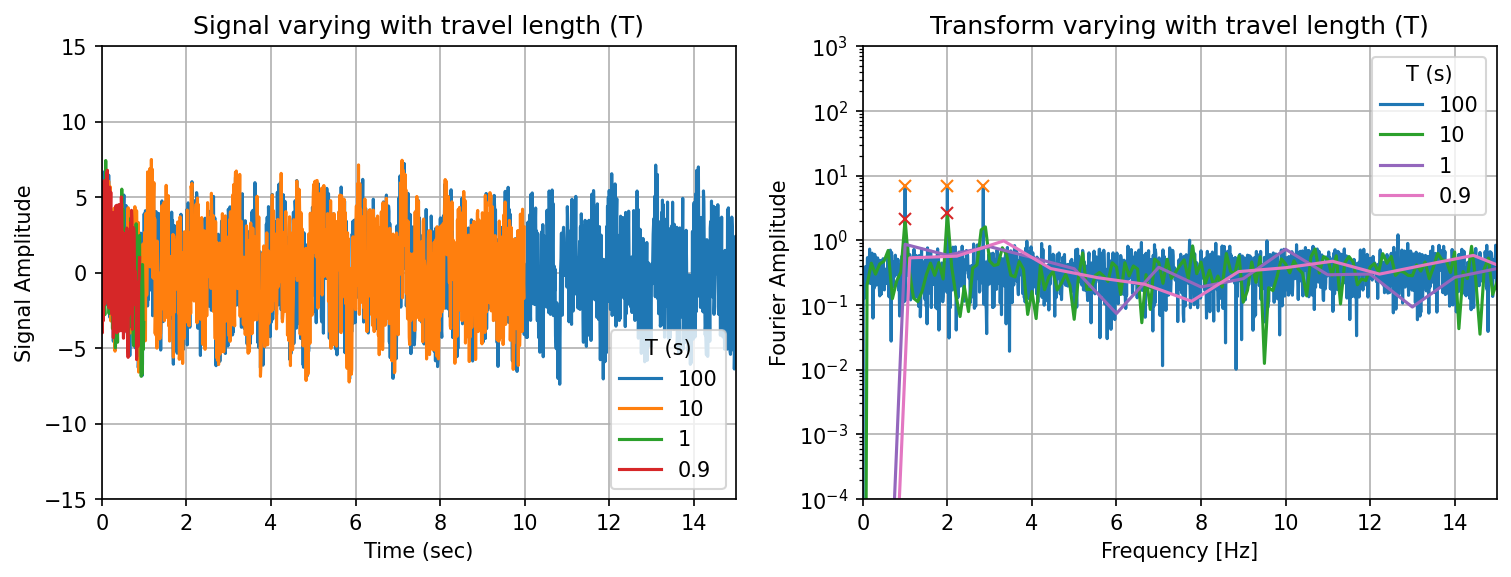

For total travel time  100 s the peaks occur at frequencies: [1.   2.   2.85] Hz
For total travel time  10 s the peaks occur at frequencies: [1. 2.] Hz


In [2]:
fs = 100 #Hz, inv. step size (multiply by h gives energy resolution)
dt = 1.0/fs #s, step size
Tlist = [100, 10, 1, 0.9] #s, travel length
sigma = 10.0 #noise offset intensity
peaks = []

fig = plt.figure(figsize=(12, 4), dpi=150)
for T in Tlist:
    plt.subplot(1, 2, 1)
    x=np.arange(0,T,dt)
    y=np.sin(2*pi*x)+np.sin(4*pi*x)+np.sin(5.7*pi*x)+np.random.rand(len(x))*sigma - sigma/2
    plt.plot(x,y,label= T)

    plt.subplot(1, 2, 2)
    f,p = psd(y,fs=fs) #frequency, spectrum
    plt.semilogy(f,np.sqrt(p),label=T)
    peaks_index, _ = find_peaks(np.log10(np.sqrt(p)),0.3)
    plt.plot(f[peaks_index], np.sqrt(p[peaks_index]), "x")
    peaks.append(f[peaks_index])

#plot details for signal plot
plt.subplot(1, 2, 1)
plt.xlim(0,15)
plt.ylim(-15,15)
plt.legend(title="T (s)")
plt.grid(True)
plt.title("Signal varying with travel length (T)")
plt.xlabel("Time (sec)")
plt.ylabel("Signal Amplitude")

#plot details for fourier transform plot
plt.subplot(1, 2, 2)
plt.title("Transform varying with travel length (T)")
plt.legend(title="T (s)")
plt.xlim(0,15)
plt.ylim(10e-5, 10e2)
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel("Fourier Amplitude")
plt.show()


print("For total travel time ", Tlist[0], "s the peaks occur at frequencies:", peaks[0] , "Hz")
print("For total travel time ", Tlist[1], "s the peaks occur at frequencies:", peaks[1], "Hz")

Second plots (as generated by Noah) reflects some noisey distrbtion and its fourier transform. The peaks reflect the frequencies with the largest contribution. This example reflects the effects of strong noise (sigma) on the signal. The larger sigma may overshadow the distribution and result in no clear peaks.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes cur

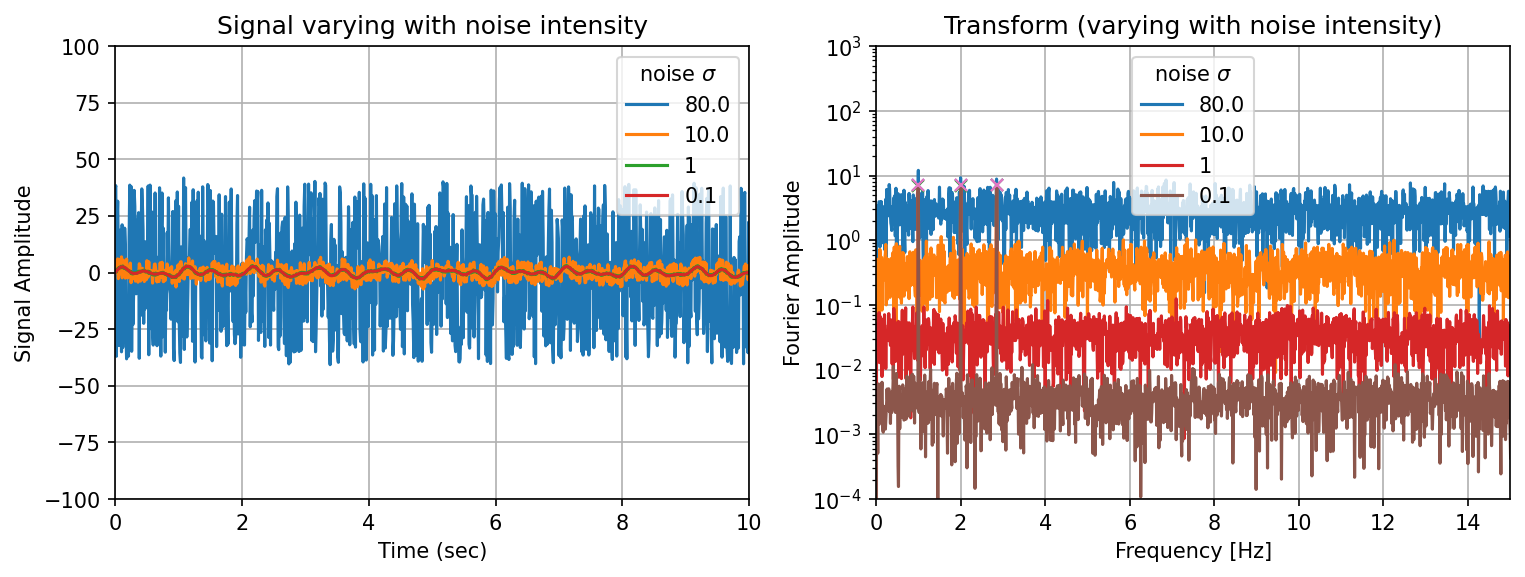

For sigma of noise  10.0 the peaks occur at frequencies: [1.   2.   2.85] Hz
For sigma of noise  1 the peaks occur at frequencies: [1.   2.   2.85] Hz


In [3]:
fs = 100 #Hz, inv. step size (multiply by h gives energy resolution)
dt = 1.0/fs #s, step size
T=100 #s, travel length
sigma_list = [80.0, 10.0, 1, 0.1] #sigma is the "intensity" of the noise
peaks = []
fig = plt.figure(figsize=(12, 4), dpi=150)

x=np.arange(0,T,dt)
for sigma in sigma_list:
    plt.subplot(1, 2, 1)
    y=np.sin(2*pi*x)+np.sin(4*pi*x)+np.sin(5.7*pi*x)+np.random.rand(len(x))*sigma - sigma/2
    plt.plot(x,y,label= sigma)

    plt.subplot(1, 2, 2)
    f,p = psd(y,fs=fs) #frequency, spectrum
    plt.semilogy(f,np.sqrt(p),label=sigma)
    if sigma < 50:    
      peaks_index, _ = find_peaks(np.log10(np.sqrt(p)),0.3)
      plt.plot(f[peaks_index], np.sqrt(p[peaks_index]), "x")
      peaks.append(f[peaks_index])

plt.subplot(1, 2, 1)
plt.xlim(0,10)
plt.ylim(-100,100)
plt.legend(title="noise $\sigma$")
plt.grid(True)
plt.title("Signal varying with noise intensity")
plt.xlabel("Time (sec)")
plt.ylabel("Signal Amplitude")

plt.subplot(1, 2, 2)
plt.title("Transform (varying with noise intensity)")
plt.legend(title="noise $\sigma$")
plt.ylim(10e-5, 10e2)
plt.xlim(0,15)
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel("Fourier Amplitude")
plt.show()


print("For sigma of noise ", sigma_list[1], "the peaks occur at frequencies:", peaks[1] , "Hz")
print("For sigma of noise ", sigma_list[2], "the peaks occur at frequencies:", peaks[2], "Hz")

Third plots (as generated by Noah) reflects some noisey distrbtion and its fourier transform. The peaks reflect the frequencies with the largest contribution. This example reflects the effects of strong noise (sigma) on the signal. The larger sigma may overshadow the distribution and result in no clear peaks.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier i

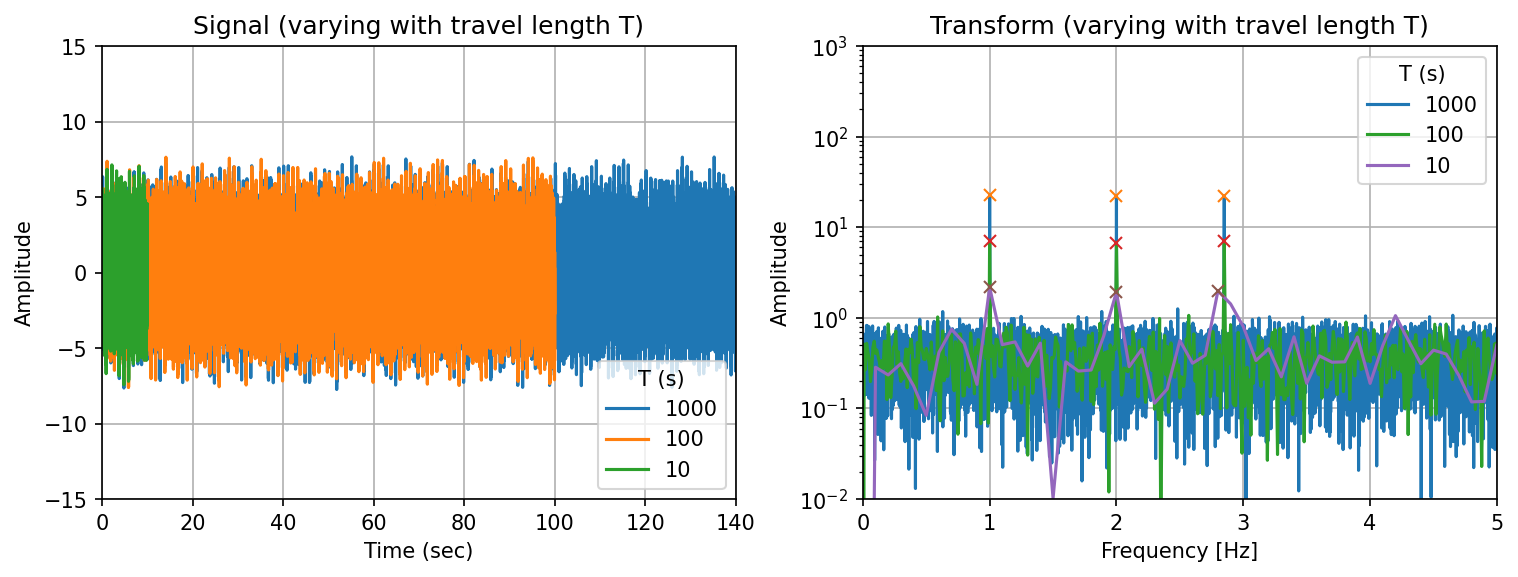

For total travel time  1000 s,  the peaks occur at frequencies: [1.   2.   2.85] Hz
For total travel time  100 s, the peaks occur at frequencies: [1.   2.   2.85] Hz
For total travel time  10 s, the peaks occur at frequencies: [1.  2.  2.8] Hz


In [4]:
fs = 100 #Hz, inv. step size (multiply by h gives energy resolution)
dt = 1.0/fs #s, step size
Tlist =  [1000, 100, 10]#s, travel length
sigma = 10
peaks =[]
fig = plt.figure(figsize=(12, 4), dpi=150)

for T in Tlist:
    plt.subplot(1, 2, 1)
    x=np.arange(0,T,dt)
    y=np.sin(2*pi*x)+np.sin(4*pi*x)+np.sin(5.7*pi*x)+np.random.rand(len(x))*sigma - sigma/2
    plt.plot(x,y,label=T)
    
    plt.subplot(1, 2, 2)
    f,p = psd(y,fs=fs)
    plt.semilogy(f,np.sqrt(p),label=T)
    peaks_index, _ = find_peaks(np.log10(np.sqrt(p)),0.2)
    plt.plot(f[peaks_index], np.sqrt(p[peaks_index]), "x")
    peaks.append(f[peaks_index])

plt.subplot(1, 2, 1)
plt.xlim(0,140)
plt.ylim(-15,15)
plt.legend(title="T (s)")
plt.grid(True)
plt.title("Signal (varying with travel length T)")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")

plt.subplot(1, 2, 2)
plt.title("Transform (varying with travel length T)")
plt.legend(title="T (s)")
plt.ylim(1e-2,1e3)
plt.xlim(0,5)
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel("Amplitude")
plt.show()

print("For total travel time ", Tlist[0], "s,  the peaks occur at frequencies:", peaks[0] , "Hz")
print("For total travel time ", Tlist[1], "s, the peaks occur at frequencies:", peaks[1], "Hz")
print("For total travel time ", Tlist[2], "s, the peaks occur at frequencies:", peaks[2], "Hz")

# Part 2: Fourier Transform Spectrometer simulation

Motorized stage details (https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=2163): 


*   Max Velocity = 2.6 mm/s
*   Max Travel Range = 12mm (12e3 µm)
*   Minimum Step Size = 0.10 µm

*   inv step size: 10000 Hz (= $\frac{max velocity}{step size}$)

Review this document for understanding of how FTS works/ data looks: https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Spectroscopy/Fundamentals_of_Spectroscopy/The_Power_of_the_Fourier_Transform_for_Spectroscopists

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In

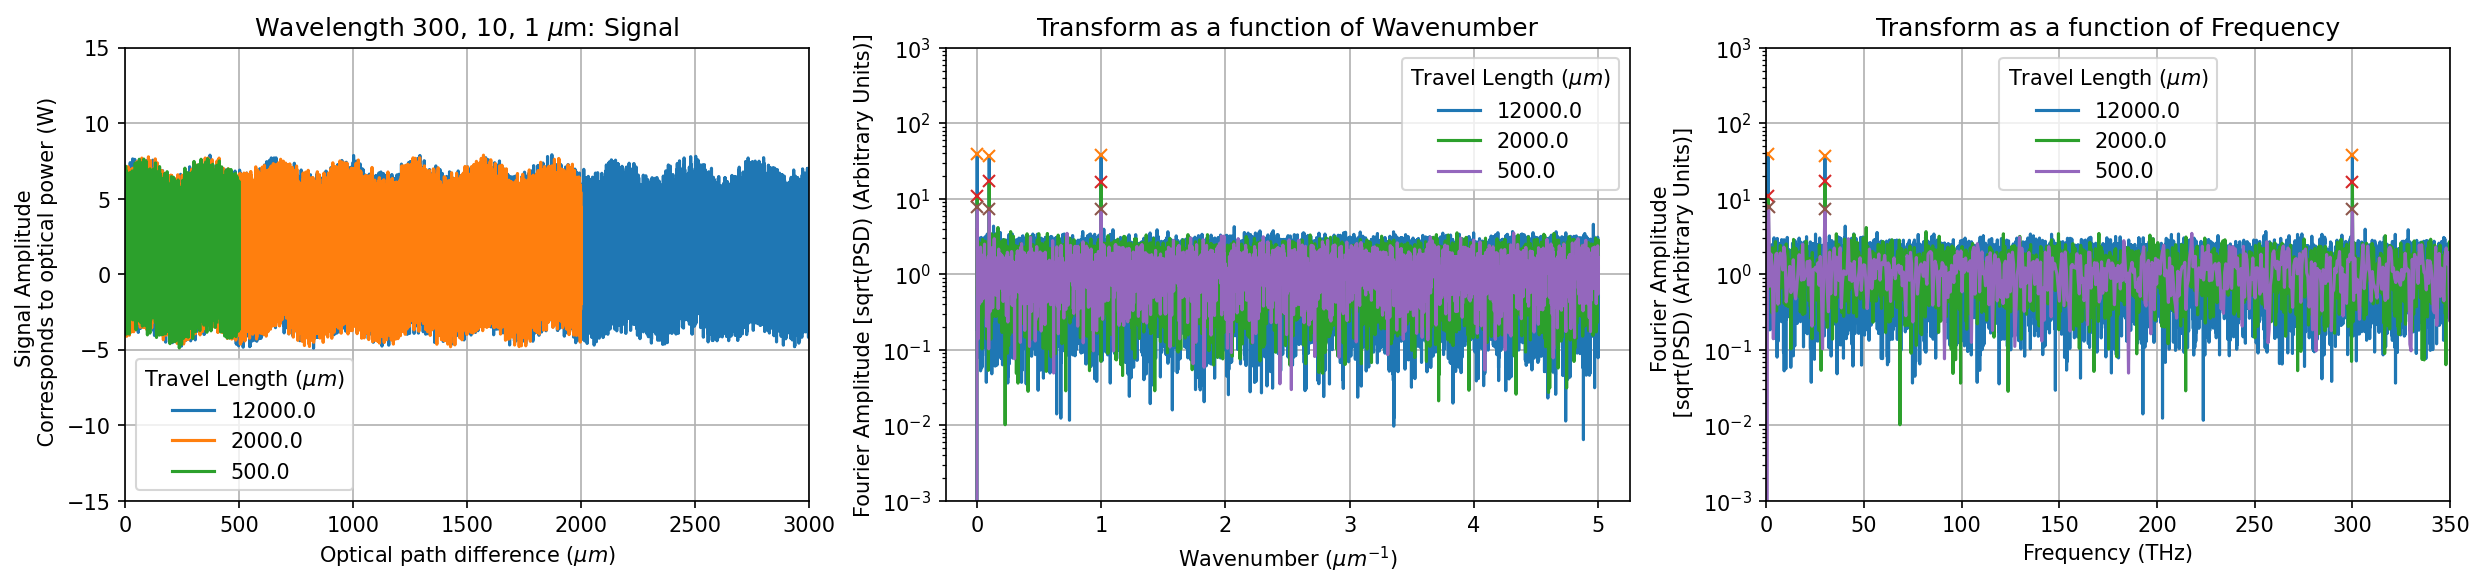

For total travel time  12000.0 s the peaks occur at frequencies: [  1.  30. 300.] THz
Since the source is at 300 µm, 10 µm, 1 µm, we expect the peaks to be at 1, 30, and 300 THz.


In [5]:
dt = 0.1 #micron, step size
fs = 1/dt #micron^-1, inv. step size (multiply by h gives energy resolution)
Tlist = [12e3, 2e3, 5e2] #micron, total travel length
sigma = 10 #noise offset intensity
peaks = []
c_micron_per_second = 3e8 * 1e6
Hz_to_THz = 1e-12

peak_thershold = 0.7 #increase this as noise increases, to ensure we are not accidnetally claiming the noise as a peak

fig = plt.figure(figsize=(20, 4), dpi=150)
for T in Tlist:
  plt.subplot(1, 3, 1)
  x=np.arange(0,T,dt)
  yNoNoise = np.zeros_like(x)
  for lam in [300.0, 10, 1]: #(microns)
    k = 1/lam
    weight = 1.0 # for blackbody, this is the blackbody intensity in W
    yNoNoise += weight*(np.sin(2*pi*k*x)/2.0 + 0.5)
  y = yNoNoise + np.random.rand(len(x))*sigma - sigma/2
  plt.plot(x,y,label= T)

  plt.subplot(1, 3, 2)
  f,p = psd(y,fs=fs) #frequency, spectrum
  plt.semilogy(f, np.sqrt(p), label=T)
  peaks_index, _ = find_peaks(np.log10(np.sqrt(p)), peak_thershold)
  plt.plot(f[peaks_index], np.sqrt(p[peaks_index]), "x")
  peaks.append(f[peaks_index])

  plt.subplot(1, 3, 3)
  plt.semilogy(f*c_micron_per_second*Hz_to_THz,np.sqrt(p),label=T)
  plt.plot(f[peaks_index]*c_micron_per_second*Hz_to_THz, np.sqrt(p[peaks_index]), "x")

#plot details for signal plot
plt.subplot(1, 3, 1)
plt.xlim(0,3e3)
plt.ylim(-15,15)
plt.grid(True)
plt.title("Wavelength 300, 10, 1 $\mu$m: Signal")
plt.legend(title="Travel Length ($\mu m$)")
plt.xlabel("Optical path difference ($\mu m$)")
plt.ylabel("Signal Amplitude \n Corresponds to optical power (W)")

#plot details for fourier transform plot
plt.subplot(1, 3, 2)
plt.title("Transform as a function of Wavenumber")
plt.ylim(1e-3, 10e2)
plt.grid(True)
plt.legend(title="Travel Length ($\mu m$)")
plt.xlabel('Wavenumber ($\mu m ^{-1}$)')
plt.ylabel("Fourier Amplitude [sqrt(PSD) (Arbitrary Units)]")

plt.subplot(1, 3, 3)
plt.title("Transform as a function of Frequency")
plt.xlim(0,350)
plt.ylim(1e-3, 10e2)
plt.grid(True)
plt.legend(title="Travel Length ($\mu m$)")
plt.xlabel('Frequency (THz)')
plt.ylabel("Fourier Amplitude \n [sqrt(PSD) (Arbitrary Units)]")
plt.show()

print("For total travel time ", Tlist[0], "s the peaks occur at frequencies:", peaks[0]*c_micron_per_second*Hz_to_THz , "THz")
print("Since the source is at 300 µm, 10 µm, 1 µm, we expect the peaks to be at 1, 30, and 300 THz.")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In

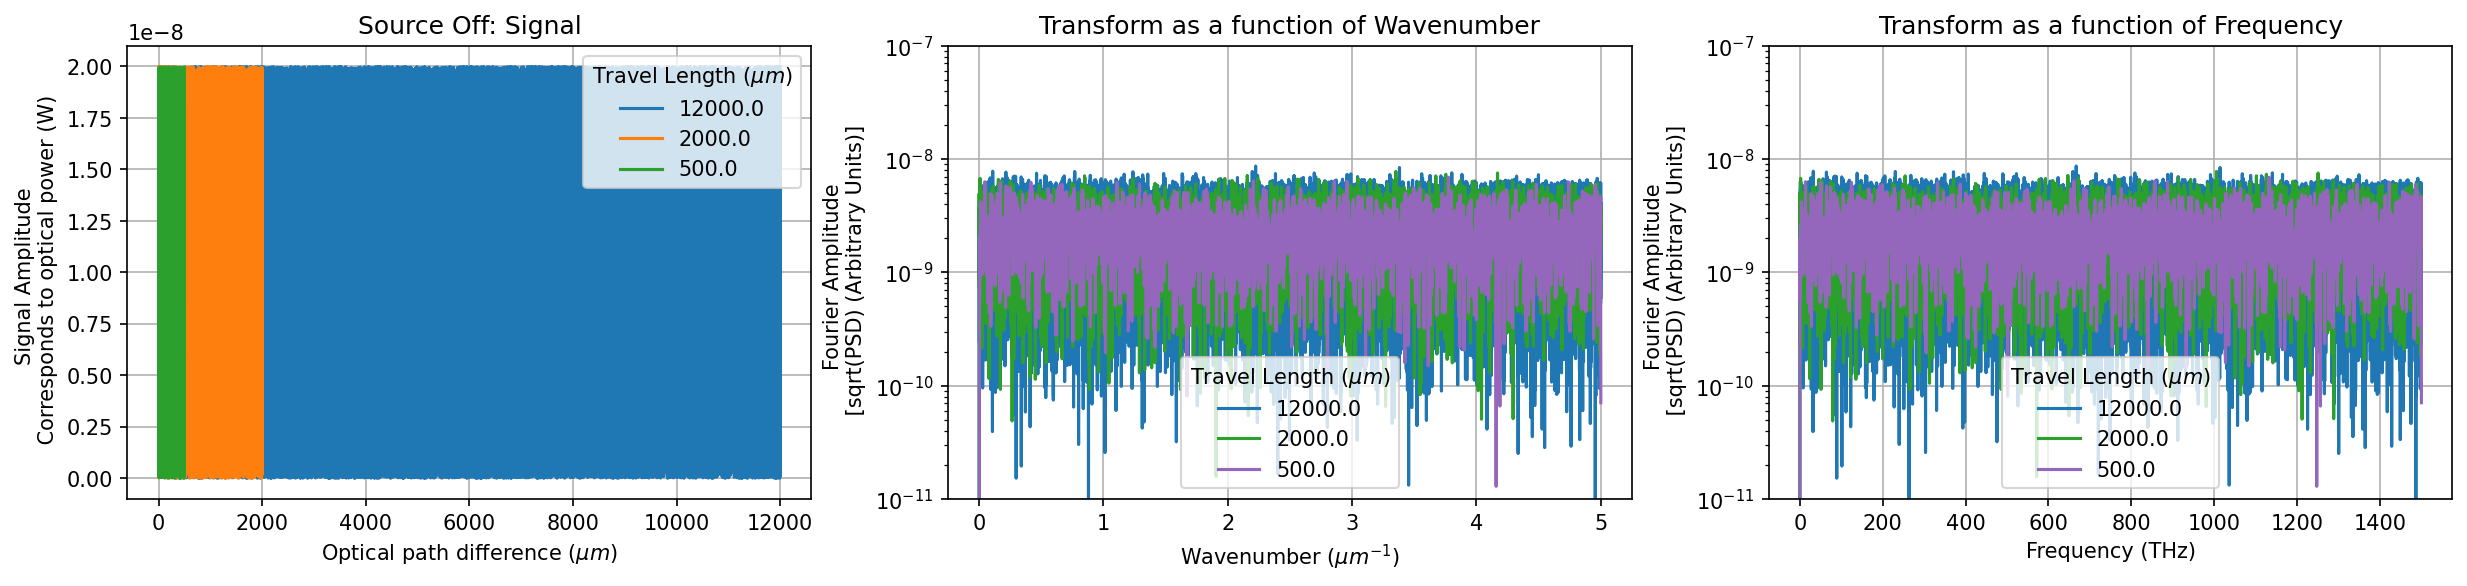

For total travel time  2000.0 s the peaks occur at frequencies: [] THz
Since the source is off, the result of of no observed peaks!


In [6]:
dt = 0.1 #micron, step size
fs = 1/dt #micron^-1, inv. step size (multiply by h gives energy resolution)
Tlist = [12e3, 2e3, 5e2] #micron, total travel length
sigma = 2e-8  #noise offset intensity
peaks = []
c_micron_per_second = 3e8 * 1e6
Hz_to_THz = 1e-12

peak_thershold = 1e-7 #increase this as noise increases, to ensure we are not accidnetally claiming the noise as a peak

fig = plt.figure(figsize=(20, 4), dpi=150)
for T in Tlist:
  plt.subplot(1, 3, 1)
  x=np.arange(0,T,dt)
  y = np.random.rand(len(x))*sigma
  plt.plot(x,y,label= T)

  plt.subplot(1, 3, 2)
  f,p = psd(y,fs=fs) #frequency, spectrum
  plt.semilogy(f, np.sqrt(p), label=T)
  peaks_index, _ = find_peaks(np.log10(np.sqrt(p)), peak_thershold)
  plt.plot(f[peaks_index], np.sqrt(p[peaks_index]), "x")
  peaks.append(f[peaks_index])

  plt.subplot(1, 3, 3)
  plt.semilogy(f*c_micron_per_second*Hz_to_THz, np.sqrt(p),label=T)
  plt.plot(f[peaks_index]*c_micron_per_second*Hz_to_THz, np.sqrt(p[peaks_index]), "x")

#plot details for signal plot
plt.subplot(1, 3, 1)
plt.grid(True)
plt.title("Source Off: Signal")
plt.legend(title="Travel Length ($\mu m$)")
plt.xlabel("Optical path difference ($\mu m$)")
plt.ylabel("Signal Amplitude \n Corresponds to optical power (W)")

#plot details for fourier transform plot
plt.subplot(1, 3, 2)
plt.title("Transform as a function of Wavenumber")
plt.ylim(1e-11, 1e-7)
plt.grid(True)
plt.legend(title="Travel Length ($\mu m$)")
plt.xlabel('Wavenumber ($\mu m ^{-1}$)')
plt.ylabel("Fourier Amplitude \n [sqrt(PSD) (Arbitrary Units)]")

plt.subplot(1, 3, 3)
plt.title("Transform as a function of Frequency")
plt.ylim(1e-11, 1e-7)
plt.grid(True)
plt.legend(title="Travel Length ($\mu m$)")
plt.xlabel('Frequency (THz)')
plt.ylabel("Fourier Amplitude \n [sqrt(PSD) (Arbitrary Units)]")
plt.show()

print("For total travel time ", Tlist[1], "s the peaks occur at frequencies:", peaks[1]*c_micron_per_second*Hz_to_THz , "THz")
print("Since the source is off, the result of of no observed peaks!")